<span style="color:red"># Currently the data here is global, go to MCSprops_subregion to select a subregion</span>

# Imports

In [31]:
%reload_ext autoreload
%matplotlib inline

In [2]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [3]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [4]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [5]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [6]:
toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [7]:
# toocan is a list. to access an object:
toocan[1]

< MCS_IntParameters object:
 . label: 2
 . qc_MCS: 11101
 . duration: 16.0
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.37
 . lonInit: 119.1
 . latInit: 5.44
 . Utime_End: 17015.2
 . lonEnd: 116.45
 . latEnd: 4.06
 . lonmin: 116.44
 . latmin: 4.05
 . lonmax: 119.1
 . latmax: 5.44
 . vavg: 5.76
 . dist: 331.93
 . olrmin: 187.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 32160.0
 . surfmaxkm2_132Wm2: 31872.0
 . surfmaxkm2_110Wm2: 31392.0
 . surfmaxkm2_90Wm2: 29552.0
 . surfcumkm2_172Wm2: 404336.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17015.0808
 . localtime_End: 17015.7193
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

In [8]:
# to access an attribute:
toocan[4].duration

12.5

# Convert dates

In [9]:
data_reference = dt.datetime(1970, 1, 1)

In [10]:
localtime_Init_dates = []
localtime_End_dates = []
for obj in toocan:
    days_Init = obj.localtime_Init
    days_End = obj.localtime_End
    date_Init = data_reference + dt.timedelta(days=days_Init)
    date_End = data_reference + dt.timedelta(days=days_End)
    localtime_Init_dates.append(date_Init)
    localtime_End_dates.append(date_End)

In [11]:
print(localtime_Init_dates[1])
print(localtime_End_dates[1])

2016-08-02 01:56:21.120000
2016-08-02 17:15:47.520000


# MCS attribute histogram

<span style="color:pink">## choose attribute and number of bins</span>

In [51]:
attribute = "surfmaxkm2_132Wm2"
nbins = 48

<span style="color:pink">##</span>

In [52]:
def attr_list(data, attr_name):
    # Extract the attribute values from the data
    attribute_values = [getattr(obj, attr_name) for obj in data]   
    return attribute_values

In [53]:
# print(attribute)
attribute_list = attr_list(toocan, attribute)

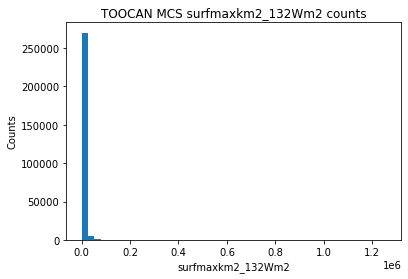

In [54]:
hist, bin_edges, _ = plt.hist(attribute_list, bins=nbins)
plt.xlabel(attribute)
plt.ylabel("Counts")
plt.title(f"TOOCAN MCS {attribute} counts")
plt.show()
# plt.savefig(f'histograms/TOOCAN_{attribute}_hist.png')

# Variable mean for each binned timestep
* note: for plot of mean, the xlabel for each bar is of the upper bin edge

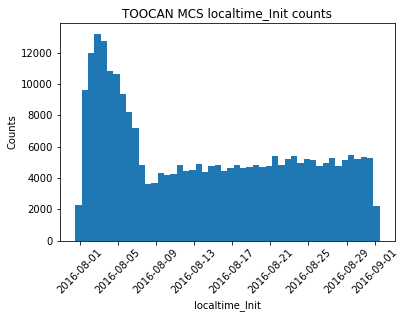

In [55]:
#-- binning times
localtime_Init_list = attr_list(toocan, "localtime_Init")
# localtime_Init_hist, localtime_Init_bin_edges, localtime_Init__ = plt.hist(localtime_Init_list, bins=nbins)
localtime_Init_hist, localtime_Init_bin_edges, localtime_Init__ = plt.hist(localtime_Init_dates, bins=nbins)

plt.xticks(rotation=45)
plt.xlabel("localtime_Init")
plt.ylabel("Counts")
plt.title(f"TOOCAN MCS localtime_Init counts")
plt.show()

In [56]:
# Extract the values of the attribute and localtime_Init from the objects
attribute_values_list = [getattr(obj, attribute) for obj in toocan]
localtime_init_values = [getattr(obj, 'localtime_Init') for obj in toocan]

# Convert localtime_Init bin edges to a NumPy array
localtime_init_bin_edges = np.array(localtime_Init_bin_edges)

# Digitize the localtime_Init values to determine the bin indices for each object
bin_indices = np.digitize(localtime_init_values, localtime_init_bin_edges)

# Calculate the mean of the attribute for each time period bin
mean_values = [np.mean(np.array(attribute_values_list)[bin_indices == i]) for i in range(1, len(localtime_init_bin_edges))]

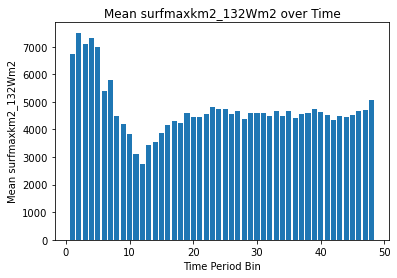

In [57]:
# Plot the mean values for each time period bin
plt.bar(range(1, len(localtime_init_bin_edges)), mean_values)
plt.xlabel('Time Period Bin')
plt.ylabel('Mean ' + attribute)
plt.title('Mean ' + attribute + ' over Time')
plt.show()

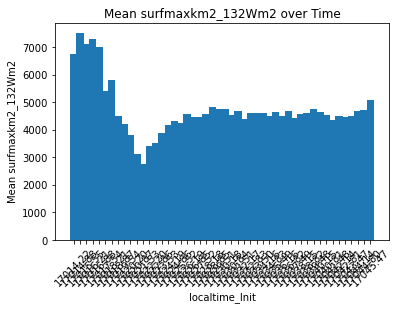

In [58]:
# Plot the mean values for each time period bin
plt.bar(localtime_init_bin_edges[1:], mean_values)
plt.xlabel('localtime_Init')
plt.ylabel('Mean ' + attribute)
plt.title('Mean ' + attribute + ' over Time')

# Set the x-axis tick labels
plt.xticks(localtime_init_bin_edges[1:], rotation=45)

plt.show()

# (UNBINNED) MCS attribute over time

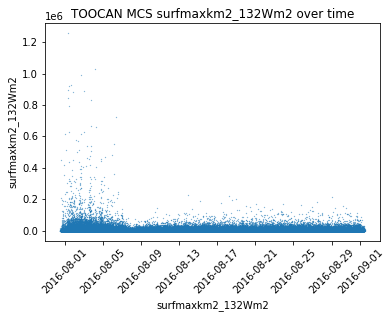

In [59]:
attribute_list = attr_list(toocan, attribute)
plt.scatter(localtime_Init_dates, attribute_list, s=0.05)
plt.xticks(rotation=45)
plt.xlabel(attribute)
plt.ylabel(f"{attribute}")
plt.title(f"TOOCAN MCS {attribute} over time")
plt.show()

# (UNBINNED) Variable mean for each timestep

In [60]:
# Extract the values of the attribute from the objects
attribute_values_list = [getattr(obj, attribute) for obj in toocan]

In [61]:
# Convert the lists to NumPy arrays for easier manipulation
localtime_Init_dates = np.array(localtime_Init_dates)
attribute_values_list = np.array(attribute_values_list)

# Sort the localtime_Init_dates and attribute_values_list based on localtime_Init_dates
sort_indices = np.argsort(localtime_Init_dates)
localtime_Init_dates_ordered = localtime_Init_dates[sort_indices]
attribute_values_list_ordered = attribute_values_list[sort_indices]

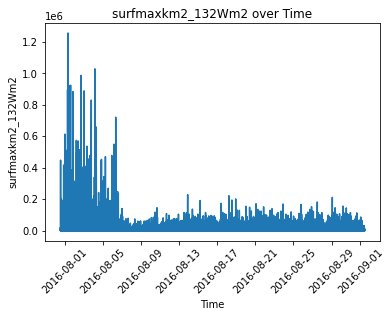

[datetime.datetime(2016, 7, 31, 13, 16, 27, 840000)
 datetime.datetime(2016, 7, 31, 13, 17, 19, 680000)
 datetime.datetime(2016, 7, 31, 13, 19, 29, 280000)
 datetime.datetime(2016, 7, 31, 13, 21, 38, 880000)
 datetime.datetime(2016, 7, 31, 13, 23, 48, 480000)
 datetime.datetime(2016, 7, 31, 13, 33, 10, 80000)
 datetime.datetime(2016, 7, 31, 13, 34, 10, 560000)
 datetime.datetime(2016, 7, 31, 13, 35, 2, 400000)
 datetime.datetime(2016, 7, 31, 13, 36, 2, 880000)
 datetime.datetime(2016, 7, 31, 13, 37, 55, 200000)] [ 8992.     0.  1808. 19104.  1600.     0.     0.   992.   208.  1280.]


In [62]:
# Plot the  values against the unique dates
plt.plot(localtime_Init_dates_ordered, attribute_values_list_ordered)

plt.xticks(rotation=45)
# Set labels and title
plt.xlabel('Time')
plt.ylabel(attribute)
plt.title(attribute + ' over Time')

# Display the plot
plt.show()
print(localtime_Init_dates_ordered[0:10], attribute_values_list_ordered[0:10])

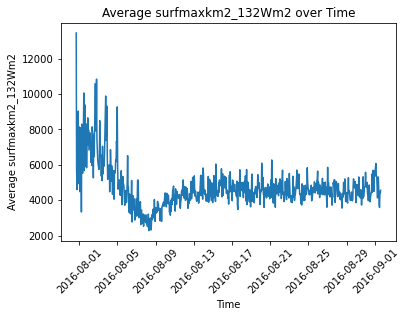

764


In [113]:
localtime_Init_dates_ordered = np.array(localtime_Init_dates_ordered)
attribute_values_list_ordered = np.array(attribute_values_list_ordered)

# convert localtime_Init_dates_ordered to timestamps in seconds
timestamps = np.array([(date - dt.datetime(1970, 1, 1)).total_seconds() for date in localtime_Init_dates_ordered])

# interval in seconds
interval_seconds = 1 * 60 * 60  # 1 hour

# average attribute values for each time interval
averaged_values = []
start_time = timestamps[0]
sum_values = 0
count = 0

end_interval_times = []

for timestamp, value in zip(timestamps, attribute_values_list_ordered):
    if timestamp - start_time <= interval_seconds:
        sum_values += value
        count += 1
    else:
        averaged_values.append(sum_values / count)
        sum_values = value
        count = 1
        start_time = timestamp
        end_interval_times.append(timestamp)

# append the average of the last interval
averaged_values.append(sum_values / count)
end_interval_times.append(timestamp)

# Plot 
# plt.plot(localtime_Init_dates_ordered[:len(averaged_values)], averaged_values)

# convert end_interval_times to datetime
end_interval_times = [dt.datetime.fromtimestamp(timestamp) for timestamp in end_interval_times]
plt.plot(end_interval_times, averaged_values)

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Average ' + attribute)
plt.title('Average ' + attribute + ' over Time')
plt.show()
print(len(averaged_values))

# Convolurion of mean variable over time (UNBINNED)

### Step 1: np.convolve

In [114]:
num_int_per_day = 24

In [115]:
#-- Defining kernel
   
# Array of length num_int_per_day full of ones then divded by num_int_per_day
# we divide by num_int_per_day to normalize
kernel = np.ones(num_int_per_day) / num_int_per_day

In [116]:
#-- Making convolution

convolved_mean_values = np.convolve(averaged_values, kernel, mode='same')

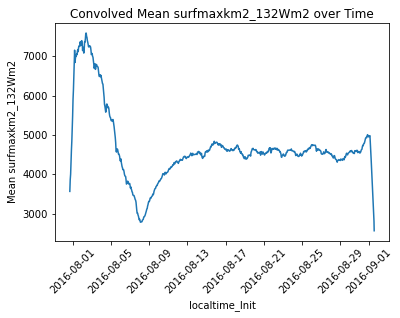

764


In [117]:
#-- Plot

# Create a figure and axes
fig, ax = plt.subplots()

plt.plot(end_interval_times, convolved_mean_values)
plt.ylabel('Convolved Data')
plt.title('Time Series Data in Daily Intervals')

plt.xticks(rotation=45)
ax.set_xlabel('localtime_Init')
plt.ylabel('Mean ' + attribute)
plt.title('Convolved Mean ' + attribute + ' over Time')


plt.show()
print(len(convolved_mean_values))

### Step 2: Filter out diurnal cycle

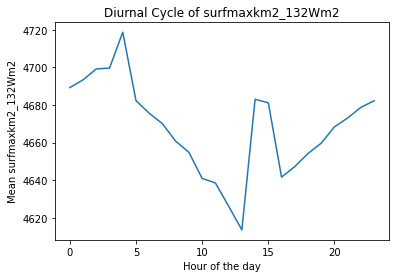

24


In [118]:
# convert datetime to hours of the day
hours = [time.hour for time in end_interval_times]

# average value for each hour of the day
diurnal_hours = range(24)  # 24 hours in a day
diurnal_cycle = []
for hour in diurnal_hours:
    # make list called values
    # if the hour in the data matches the hour in the current loop, append the data value to values list
    # find the mean for the hour in the current loop (e.g. average of all data in hour 20)
    values = [value for value, h in zip(convolved_mean_values, hours) if h == hour]
    average_value = np.mean(values)
    diurnal_cycle.append(average_value)

# Plot the diurnal cycle
plt.plot(diurnal_hours, diurnal_cycle)
plt.xlabel('Hour of the day')
plt.ylabel('Mean ' + attribute)
plt.title('Diurnal Cycle of ' + attribute)
plt.show()
print(len(diurnal_cycle))

<span style="color:red"># Rest of code in MCSprops_subregion</span>